In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Librairies orienté objet ,

Etapes:
+ **Selectionner un Modele** appele aussi *Estimator* et preciser ses hyperparametres. 
+ $model = LinearRegession(....)$
+ **Entrainer les modeles** Sur les donnees X,y(divisé en deux tableaux numpy).  
+ $model.fit(X,y)$
+ **Evaluer le score**.  
+ $model.score(y)$
+ Si on est satisfait et on **utilise notre modele**. $model.predict(newX)$

===>load dataframe

In [52]:
df = pd.read_csv('./insurance.csv')

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


charges ===> target
#EDA -- analise exploratoire de Données
Etapes
==> Missing values
==> Categorie Values vs Numerical
==> Doublon
==> Mesure stats ===> Mean, min, std ,....
BUt ==>
==> NEttoyage des donnnées

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

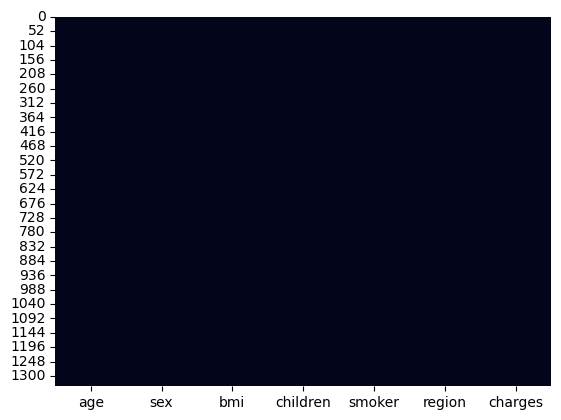

In [55]:
# Verifier les null !
import seaborn as sns
number_of_missing = df.isna()
sns.heatmap(number_of_missing, cbar=False)
#En blanc , les données null !

In [56]:
#somme des lignes null
number_of_missing.sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

visualisation

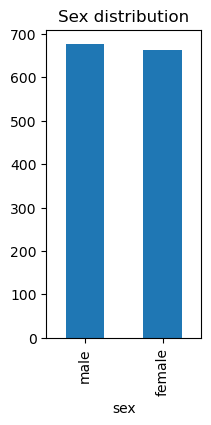

In [57]:
plt.figure(figsize=(2,4))
plt.title("Sex distribution")
df.sex.value_counts().plot(kind='bar')

plt.show()

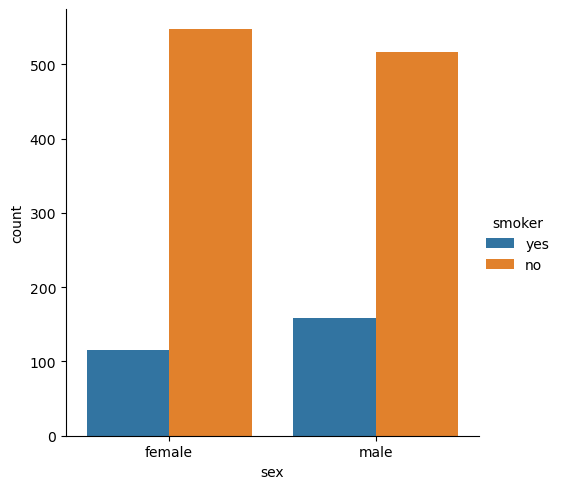

In [58]:
sns.catplot(data=df,x="sex",kind='count',hue='smoker')
plt.show()

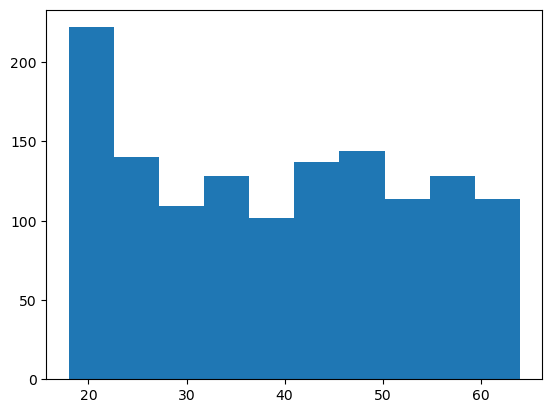

In [59]:
plt.hist(x=df.age,bins=10)
plt.show()

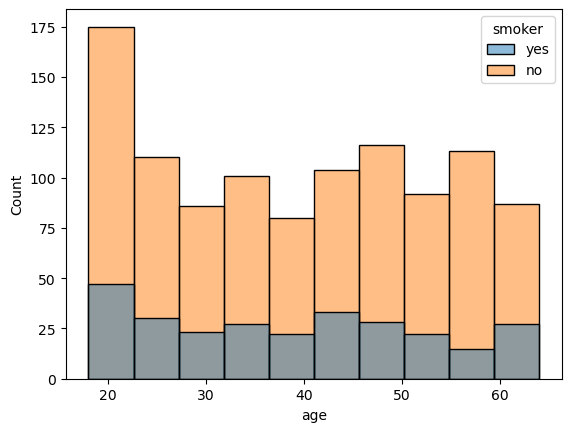

In [60]:
sns.histplot(data=df ,x='age',hue='smoker',bins=10)
plt.show()

Categorical vs numerical
Get_dummies

In [61]:
df.sex
#df.sex.replace({"male":1,"female":0}) ===>
df.sex=pd.get_dummies(df.sex,drop_first=True)
# Modifie les colonnes en booleen et supprime la premiere colonne
df.smoker=pd.get_dummies(df.smoker,drop_first=True)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


Pour les region on va faire

In [62]:
#pd.get_dummies(df.region)
from sklearn.preprocessing import OneHotEncoder

In [63]:
transformer=OneHotEncoder

In [64]:
df[['northwest','southeast','southwest']]  =pd.get_dummies(df.region , drop_first=True)
df.drop("region",axis=1,inplace=True)
df.head()
#northesat == 0,0,0

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,True
1,18,True,33.770,1,False,1725.55230,False,True,False
2,28,True,33.000,3,False,4449.46200,False,True,False
3,33,True,22.705,0,False,21984.47061,True,False,False
4,32,True,28.880,0,False,3866.85520,True,False,False


### model
+ split feature et target
+ train et test 
+ training on train set
+ evaluer on train Et test set
+ create fonction api pour la prediction

In [65]:
# feature et target
X =df.drop("charges",axis=1)
y=df.charges

In [70]:
# train et test split = entrainement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape

(1070, 8)

In [72]:
y_train.shape

(1070,)

In [75]:
#evaluer on train Et test set ===> deja fait l'import
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
model.score(X_train,y_train)

0.7417255854683333

In [77]:
model.score(X_test,y_test)

0.7835929767120724

In [78]:
exam=DecisionTreeRegressor()
exam.fit(X_train,y_train)

DecisionTreeRegressor()

In [79]:
exam.score(X_train,y_train)

0.9983078124756305

In [80]:
exam.score(X_test,y_test)

0.7151869147959233

In [81]:
# prediction
y_pred=model.predict(X_test)

In [82]:
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error
r2_score(y_test,y_pred)


0.7835929767120724